In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
file = '/home/putra/Documents/Ds Course/building-permit-applications-data/Building_Permits.csv'
data = pd.read_csv(file)

/home/putra/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data.sample(10)

Permit Number  Permit Type            Permit Type Definition  \
193609  201801057927            3  additions alterations or repairs   
150532  201702240064            8            otc alterations permit   
129307  201607051576            8            otc alterations permit   
6051    201303061572            3  additions alterations or repairs   
28594   201310219830            2       new construction wood frame   
66153   201410300364            8            otc alterations permit   
21473   201308134188            8            otc alterations permit   
197051       M886947            8            otc alterations permit   
106076  201511162684            3  additions alterations or repairs   
365     201710272463            4                      sign - erect   

       Permit Creation Date Block  Lot  Street Number Street Number Suffix  \
193609           01/05/2018  2798  023              4                  NaN   
150532           02/24/2017  1649  025            734                  NaN   
129307           07/05/2016  0312  031             31                  NaN   
6051             03/06/2013  5531  016             23                  NaN   
28594            10/21/2013  2619  066             24                  NaN   
66153            10/30/2014  2507  015           2779                  NaN   
21473            08/13/2013  0642  036           1700                  NaN   
197051           02/08/2018  0587  014           2500                  NaN   
106076           11/16/2015  1434  035            330                  NaN   
365              10/27/2017  6249  020           2442                  NaN   

       Street Name Street Suffix  ...  Existing Construction Type  \
193609   Aquavista            Wy  ...                         5.0   
150532        07th            Av  ...                         5.0   
129307       Geary            St  ...                         1.0   
6051       Peralta            Av  ...                         5.0   
28594          Ord            Ct  ...                         NaN   
66153         38th            Av  ...                         5.0   
21473   California            St  ...                         1.0   
197051     Steiner            St  ...                         NaN   
106076        03rd            Av  ...                         5.0   
365      Bay Shore            Bl  ...                         5.0   

       Existing Construction Type Description Proposed Construction Type  \
193609                         wood frame (5)                        5.0   
150532                         wood frame (5)                        5.0   
129307                          constr type 1                        1.0   
6051                           wood frame (5)                        5.0   
28594                                     NaN                        5.0   
66153                          wood frame (5)                        5.0   
21473                           constr type 1                        1.0   
197051                                    NaN                        NaN   
106076                         wood frame (5)                        5.0   
365                            wood frame (5)                        NaN   

       Proposed Construction Type Description Site Permit Supervisor District  \
193609                         wood frame (5)           Y                 7.0   
150532                         wood frame (5)         NaN                 1.0   
129307                          constr type 1         NaN                 3.0   
6051                           wood frame (5)         NaN                 9.0   
28594                          wood frame (5)           Y                 8.0   
66153                          wood frame (5)         NaN                 4.0   
21473                           constr type 1         NaN                 2.0   
197051                                    NaN         NaN                 2.0   
106076                         wood fram

# 1. Data Pre-Processing

### Check Missing Values

In [3]:
missing_value = data.isnull().sum()
missing_value_sorted = missing_value.sort_values(ascending=False)
print(missing_value_sorted)
print(data.shape)

TIDF Compliance                           198898
Voluntary Soft-Story Retrofit             198865
Unit Suffix                               196939
Street Number Suffix                      196684
Site Permit                               193541
Structural Notification                   191978
Fire Only Permit                          180073
Unit                                      169421
Completed Date                            101709
Permit Expiration Date                     51880
Existing Units                             51538
Proposed Units                             50911
Existing Construction Type                 43366
Existing Construction Type Description     43366
Proposed Construction Type                 43162
Proposed Construction Type Description     43162
Number of Proposed Stories                 42868
Number of Existing Stories                 42784
Proposed Use                               42439
Existing Use                               41114
Estimated Cost      

In [4]:
missing_value_sorted_percentage = missing_value_sorted.divide(data.shape[0])*100

For the Address suffix the nan value is mostly because the address has no suffix info.

so i'm gonna keep it as NaN value

In [5]:
data['Unit Suffix'].unique()

array([nan, 'A', 'D', 'BLDG 1', 'C', 'B', 'E', 'FRONT', 'F', 'COMML',
       'HOA', 'L', 'B20H', 'COMMERCIAL', "RES'L", 'UPPER', 'G', 'H',
       "RESID'L", 'FRONT BLDG', 'RETAIL 1', 'RESIDL 3/F', 'P',
       'OFFICE 2/F', 'BLDG E', 'BLDG D', 'BLDG C', 'BLDG B', 'BLDG A',
       'PIER 3', 'PIER 2', 'PIER 1', 'J', 'PH-4', 'RESIDENCE', 'C132',
       'REAR UNIT', 'FRONT UNIT', 'REAR', 'LOWER', 'PH2B', 'RESIDENTIA',
       'W', 'REAR BLDG', 'PH', '#R-2', '1A-4', 'THEATRE', 'BLDG. 3',
       'RESDL/REAR', 'T', 'N', 'UTILITY', 'BLDG 3', 'O', 'LOWER UNIT',
       'FRNT RIGHT', 'MIDDLE', 'STORE', 'R', '1/F', '2/F', 'REAR G/F',
       'BLDG 449', "COM'L 1/F", 'CU-3', 'PH-1', 'FRNT BLDG', 'K',
       'LEAS OFFIC', 'COMML-3', 'S', 'M', 'PH1C', "COM'L", 'LEVEL 4',
       'BLD 7', '1503B', 'BLDG 3F', 'TENTATIVE', 'C1', 'CHILD DEV',
       'BASEMENT', '3/F', 'CU-2', 'C102', 'EAST', 'WEST', 'UPPER UNIT',
       'Garage', '0', 'COMML-2', '-A', '-B', 'FRNT ENTRA', 'C-4', 'A102',
       'BLDG 3E', '1ST

In [6]:
data['TIDF Compliance'].unique()

array([nan, 'Y', 'P'], dtype=object)

Using missingno package to display missines of data visually

In [7]:
import missingno as msno

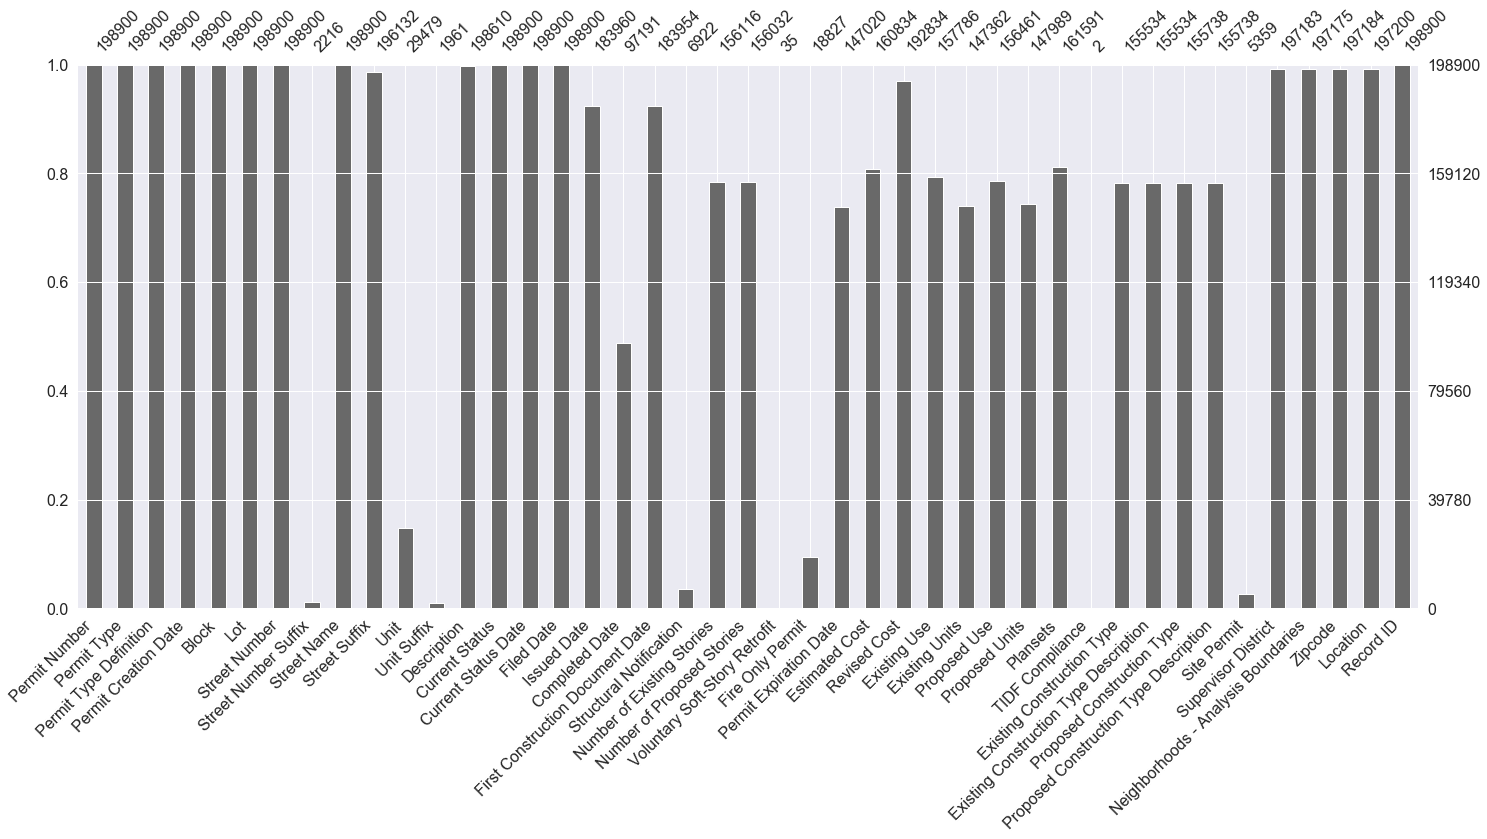

In [8]:
msno.bar(data)

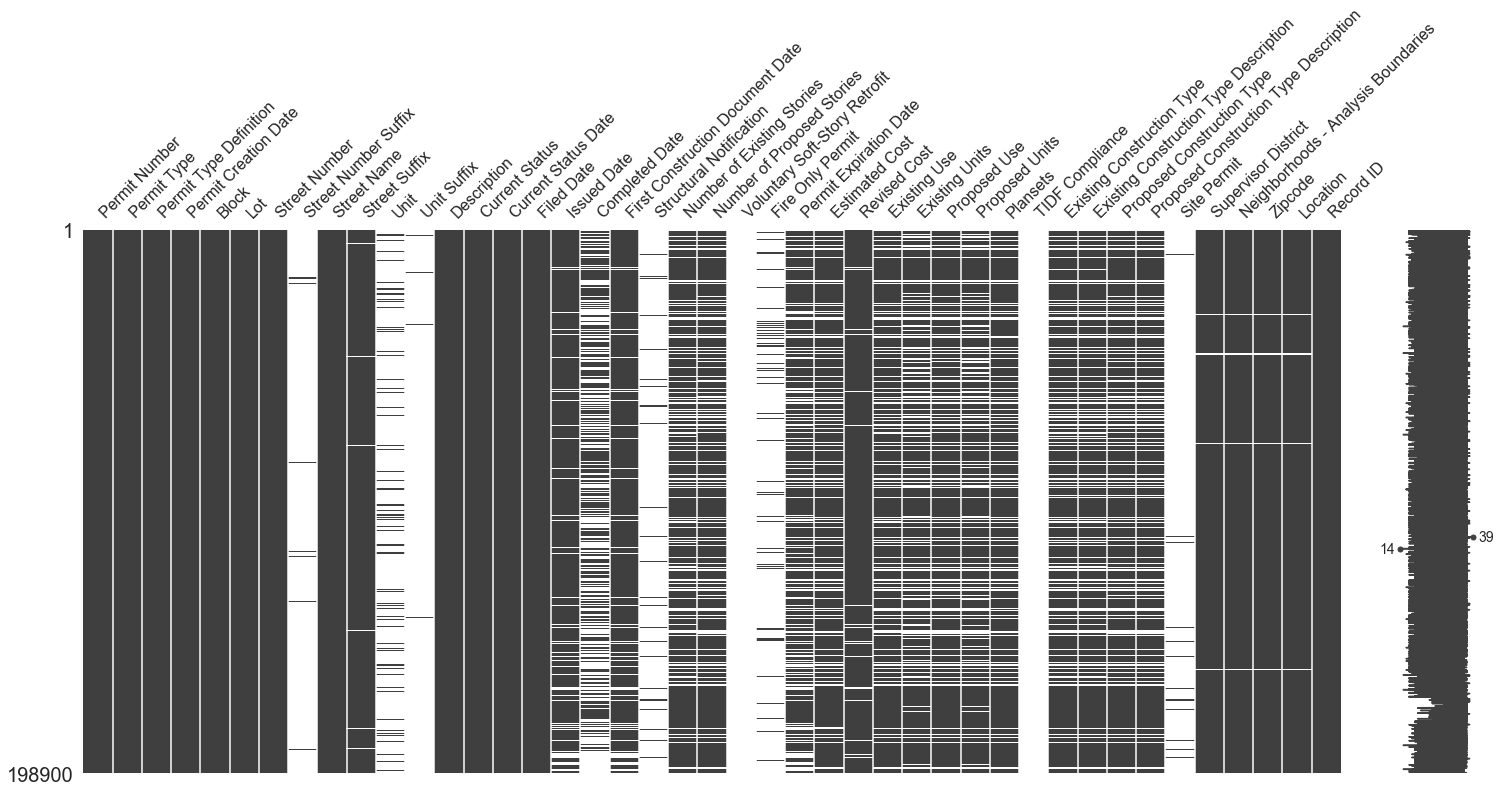

In [9]:
msno.matrix(data)

Identify the missing not at random data by checking the correlation using heatmap

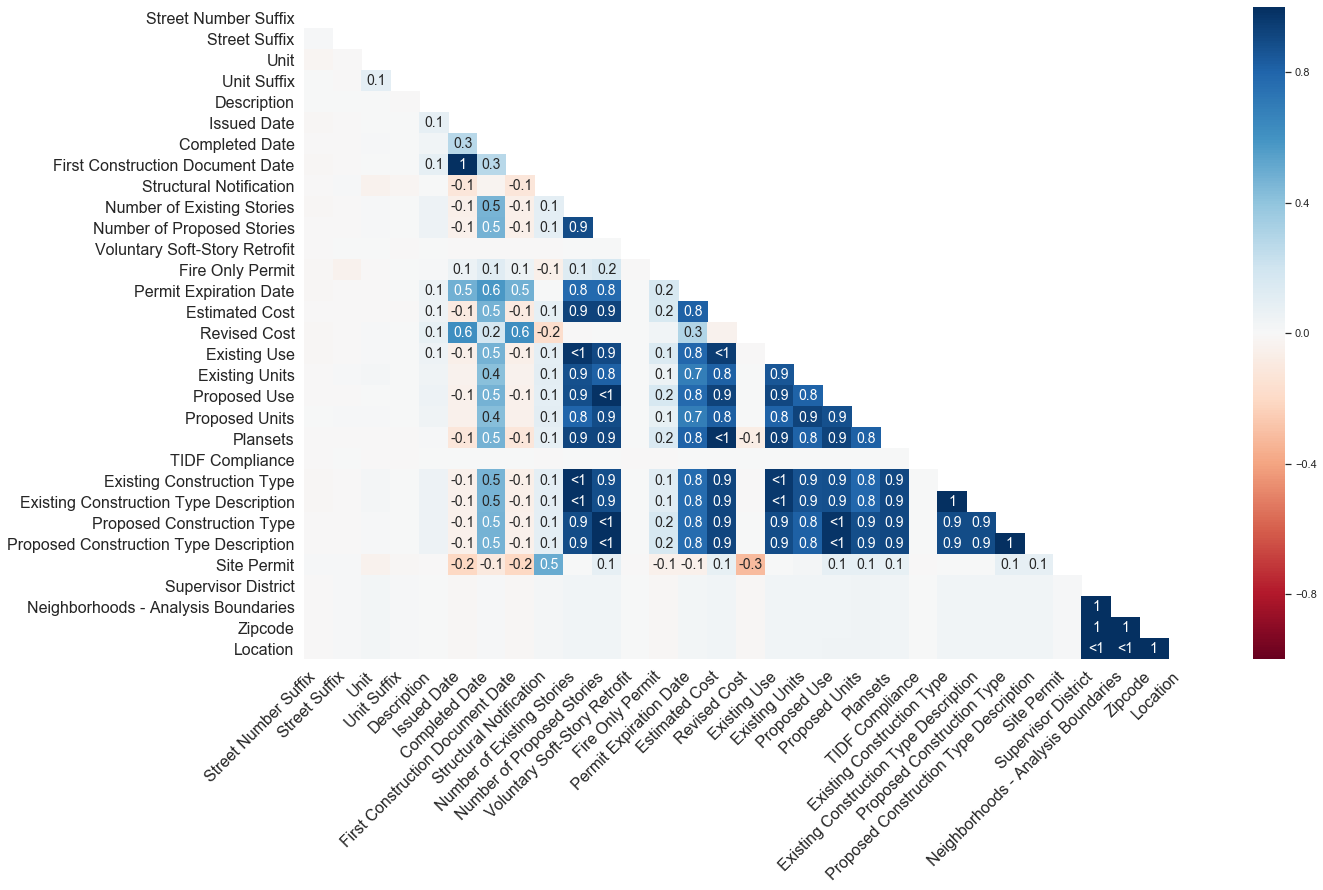

In [10]:
msno.heatmap(data)

It seems there are so many missing value not at random

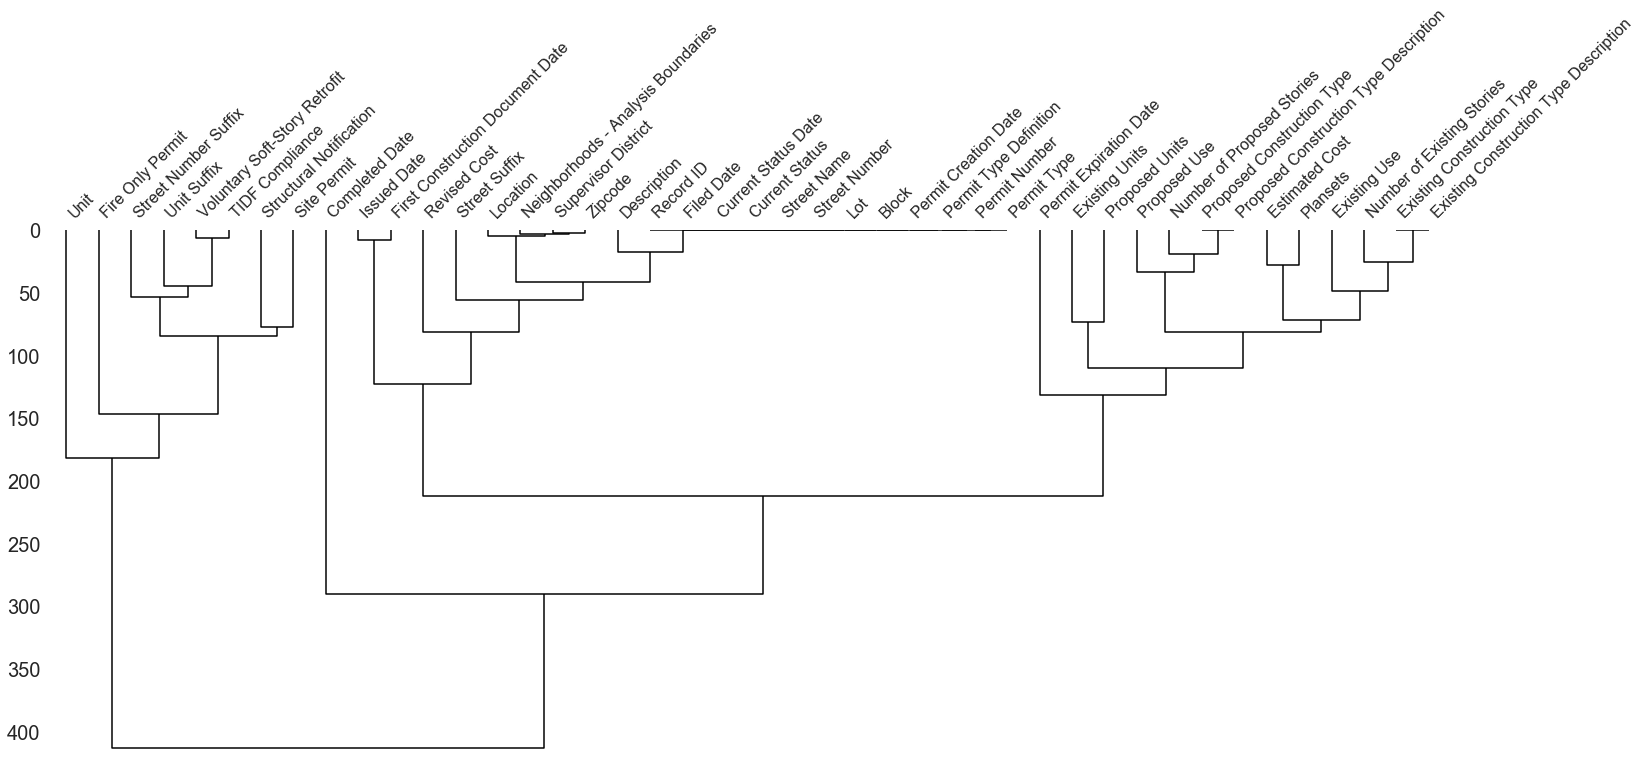

In [11]:
msno.dendrogram(data)

let's see the group of columns, and consider whats columns that need to be deleted (which don't have any inpact in our analysis)

## Group 1

In [12]:
first_group = missing_value_sorted_percentage.head(10)
description = pd.read_excel('/home/putra/Documents/Ds Course/building-permit-applications-data/DataDictionaryBuildingPermit.xlsx', sheet_name ='Sheet1')

In [13]:
description.head(10)

Sl No             Column name  \
0      1           Permit Number   
1      2             Permit Type   
2      3  Permit Type Definition   
3      4    Permit Creation Date   
4      5                   Block   
5      6                     Lot   
6      7           Street Number   
7      8    Street Number Suffix   
8      9             Street Name   
9     10      Street Name Suffix   

                                         Description  
0                       Number assigned while filing  
1        Type of the permit represented numerically.  
2  Description of the Permit type, for example\n ...  
3  Date on which permit created, later than \nor ...  
4                                 Related to address  
5                                 Related to address  
6                                 Related to address  
7                                 Related to address  
8                                 Related to address  
9                                 Related to address

In [14]:
data.columns[0:10]

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number',
       'Street Number Suffix', 'Street Name', 'Street Suffix'],
      dtype='object')

Columns that are not relevant to our analysis are:

1. Permit Type Definition : because it's explain other variable.
2. The address related columns : for the city development i will just use the location columns

The address related Columns will be kept, because they are relevant to analyze the developments of the city


In [15]:
data1 = data.drop(['Permit Type Definition','Block', 'Lot', 'Street Number', 'Street Number Suffix', 'Street Name', 'Street Suffix'], axis = 1)
data1.head()

Permit Number  Permit Type Permit Creation Date  Unit Unit Suffix  \
0  201505065519            4           05/06/2015   NaN         NaN   
1  201604195146            4           04/19/2016   0.0         NaN   
2  201605278609            3           05/27/2016   NaN         NaN   
3  201611072166            8           11/07/2016   0.0         NaN   
4  201611283529            6           11/28/2016   NaN         NaN   

                                         Description Current Status  \
0  ground fl facade: to erect illuminated, electr...        expired   
1            remove (e) awning and associated signs.         issued   
2                    installation of separating wall      withdrawn   
3           repair dryrot & stucco at front of bldg.       complete   
4  demolish retail/office/commercial 3-story buil...         issued   

  Current Status Date  Filed Date Issued Date  ... Existing Construction Type  \
0          12/21/2017  05/06/2015  11/09/2015  ...                        3.0   
1          08/03/2017  04/19/2016  08/03/2017  ...                        3.0   
2          09/26/2017  05/27/2016         NaN  ...                        1.0   
3          07/24/2017  11/07/2016  07/18/2017  ...                        5.0   
4          12/01/2017  11/28/2016  12/01/2017  ...                        3.0   

  Existing Construction Type Description Proposed Construction Type  \
0                          constr type 3                        NaN   
1                          constr type 3                        NaN   
2                          constr type 1                        1.0   
3                         wood frame (5)                        5.0   
4                          constr type 3                        NaN   

   Proposed Construction Type Description  Site Permit Supervisor District  \
0                                     NaN          NaN                 3.0   
1                                     NaN          NaN                 3.0   
2                           constr type 1          NaN                 3.0   
3                          wood frame (5)          NaN                 3.0   
4                                     NaN          NaN                 6.0   

  Neighborhoods - Analysis Boundaries  Zipcode  \
0                          Tenderloin  94102.0   
1                          Tenderloin  94102.0   
2                        Russian Hill  94109.0   
3                            Nob Hill  94109.0   
4                          Tenderloin  94102.0   

                                    Location      Record ID  
0  (37.785719256680785, -122.40852313194863)  1380611233945  
1   (37.78733980600732, -122.41063199757738)  1420164406718  
2    (37.7946573324287, -122.42232562979227)  1424856504716  
3   (37.79595867909168, -122.41557405519474)  1443574295566  
4   (37.78315261897309, -122.40950883997789)   144548169992  

[5 rows x 36 columns]

## Group 2

In [16]:
data.columns[10:20]

Index(['Unit', 'Unit Suffix', 'Description', 'Current Status',
       'Current Status Date', 'Filed Date', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Structural Notification'],
      dtype='object')

Again, the columns that are not relevant to our analysis, and has correlation with other columns are:

1. Unit
2. Unit Suffix

In [17]:
data2 = data1.drop(['Unit', 'Unit Suffix'], axis = 1)
data2.head()

Permit Number  Permit Type Permit Creation Date  \
0  201505065519            4           05/06/2015   
1  201604195146            4           04/19/2016   
2  201605278609            3           05/27/2016   
3  201611072166            8           11/07/2016   
4  201611283529            6           11/28/2016   

                                         Description Current Status  \
0  ground fl facade: to erect illuminated, electr...        expired   
1            remove (e) awning and associated signs.         issued   
2                    installation of separating wall      withdrawn   
3           repair dryrot & stucco at front of bldg.       complete   
4  demolish retail/office/commercial 3-story buil...         issued   

  Current Status Date  Filed Date Issued Date Completed Date  \
0          12/21/2017  05/06/2015  11/09/2015            NaN   
1          08/03/2017  04/19/2016  08/03/2017            NaN   
2          09/26/2017  05/27/2016         NaN            NaN   
3          07/24/2017  11/07/2016  07/18/2017     07/24/2017   
4          12/01/2017  11/28/2016  12/01/2017            NaN   

  First Construction Document Date  ... Existing Construction Type  \
0                       11/09/2015  ...                        3.0   
1                       08/03/2017  ...                        3.0   
2                              NaN  ...                        1.0   
3                       07/18/2017  ...                        5.0   
4                       11/20/2017  ...                        3.0   

   Existing Construction Type Description  Proposed Construction Type  \
0                           constr type 3                         NaN   
1                           constr type 3                         NaN   
2                           constr type 1                         1.0   
3                          wood frame (5)                         5.0   
4                           constr type 3                         NaN   

  Proposed Construction Type Description Site Permit Supervisor District  \
0                                    NaN         NaN                 3.0   
1                                    NaN         NaN                 3.0   
2                          constr type 1         NaN                 3.0   
3                         wood frame (5)         NaN                 3.0   
4                                    NaN         NaN                 6.0   

   Neighborhoods - Analysis Boundaries  Zipcode  \
0                           Tenderloin  94102.0   
1                           Tenderloin  94102.0   
2                         Russian Hill  94109.0   
3                             Nob Hill  94109.0   
4                           Tenderloin  94102.0   

                                    Location      Record ID  
0  (37.785719256680785, -122.40852313194863)  1380611233945  
1   (37.78733980600732, -122.41063199757738)  1420164406718  
2    (37.7946573324287, -122.42232562979227)  1424856504716  
3   (37.79595867909168, -122.41557405519474)  1443574295566  
4   (37.78315261897309, -122.40950883997789)   144548169992  

[5 rows x 34 columns]

## Group 3

In [18]:
data.columns[20:30]

Index(['Number of Existing Stories', 'Number of Proposed Stories',
       'Voluntary Soft-Story Retrofit', 'Fire Only Permit',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use'],
      dtype='object')

there is no column to be ignore

## Group 4

In [19]:
data.columns[30:]

Index(['Proposed Units', 'Plansets', 'TIDF Compliance',
       'Existing Construction Type', 'Existing Construction Type Description',
       'Proposed Construction Type', 'Proposed Construction Type Description',
       'Site Permit', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Zipcode', 'Location',
       'Record ID'],
      dtype='object')

Columns that are not relevant to our analysis, and has correlation with other columns are:

1. Existing Construction Type Description
2. Proposed Construction Type Description
3. Zipcode , because i'm goinnt to use Location column for the address information
4. Record Id

In [20]:
data_prepared = data2.drop(['Existing Construction Type Description', 'Proposed Construction Type Description', 'Zipcode', 'Record ID'], axis = 1)
data_prepared.sample(10)

Permit Number  Permit Type Permit Creation Date  \
114272       M663388            8           02/12/2016   
187495       M849267            8           10/30/2017   
65614   201410279944            8           10/27/2014   
191428  201712085977            8           12/08/2017   
78564   201503110553            3           03/11/2015   
147690  201701197441            8           01/19/2017   
110500  201601056353            8           01/05/2016   
15606   201306119250            8           06/11/2013   
117991  201603172409            8           03/17/2016   
187019  201710252183            8           10/25/2017   

                                              Description Current Status  \
114272                                street space permit         issued   
187495                                       street space         issued   
65614   green compliacne documentation change form c-4...       complete   
191428  repairs to kitchen and living - water damge wa...         issued   
78564   furnish and install new fire alarm system, t.i...       complete   
147690  new steps, fence, paving, fountain feature, pl...         issued   
110500  due to water leak, need to replace outside sid...         issued   
15606   attached blue print.  fixing fire damage and d...       complete   
117991  remodel bath, replace exhaust fan, floor tile,...       complete   
187019  add an ufer ground on the ground floor level. ...         issued   

       Current Status Date  Filed Date Issued Date Completed Date  \
114272          02/12/2016  02/12/2016  02/12/2016            NaN   
187495          10/30/2017  10/30/2017  10/30/2017            NaN   
65614           03/06/2015  10/27/2014  11/12/2014     03/06/2015   
191428          12/08/2017  12/08/2017  12/08/2017            NaN   
78564           03/23/2016  03/11/2015  11/10/2015     03/23/2016   
147690          02/21/2017  01/19/2017  02/21/2017            NaN   
110500          01/05/2016  01/05/2016  01/05/2016            NaN   
15606           06/06/2014  06/11/2013  06/13/2013     06/06/2014   
117991          07/26/2016  03/17/2016  03/17/2016     07/26/2016   
187019          10/25/2017  10/25/2017  10/25/2017            NaN   

       First Construction Document Date  ...       Proposed Use  \
114272                       02/12/2016  ...                NaN   
187495                       10/30/2017  ...                NaN   
65614                        11/12/2014  ...         apartments   
191428                       12/08/2017  ...         apartments   
78564                        11/10/2015  ...         apartments   
147690                       02/21/2017  ...  2 family dwelling   
110500                       01/05/2016  ...       retail sales   
15606                        06/13/2013  ...         apartments   
117991                       03/17/2016  ...   artist live/work   
187019                       10/25/2017  ...       retail sales   

        Proposed Units  Plansets TIDF Compliance Existing Construction Type  \
114272             NaN       NaN             NaN                        NaN   
187495             NaN       NaN             NaN                        NaN   
65614             12.0       2.0             NaN                        NaN   
191428            52.0       0.0             NaN                        5.0   
78564             24.0       2.0             NaN                        5.0   
147690             2.0       2.0             NaN                        5.0   
110500             2.0       0.0             NaN                        5.0   
15606              4.0       2.0             NaN                        5.0   
117991            48.0       0.0             NaN                        5.0   
187019            16.0       0.0             NaN                        5.0   

       Proposed Construction Type  Site Permit  Supervisor District  \
114272                        NaN          NaN                  8.0   
187495               

Now , let's see the Missing Values after the reduction of columns

In [21]:
data_prepared.isnull().mean().sort_values(ascending = False)

TIDF Compliance                        0.999990
Voluntary Soft-Story Retrofit          0.999824
Site Permit                            0.973057
Structural Notification                0.965199
Fire Only Permit                       0.905344
Completed Date                         0.511357
Permit Expiration Date                 0.260835
Existing Units                         0.259115
Proposed Units                         0.255963
Existing Construction Type             0.218029
Proposed Construction Type             0.217004
Number of Proposed Stories             0.215525
Number of Existing Stories             0.215103
Proposed Use                           0.213369
Existing Use                           0.206707
Estimated Cost                         0.191383
Plansets                               0.187577
First Construction Document Date       0.075143
Issued Date                            0.075113
Revised Cost                           0.030498
Neighborhoods - Analysis Boundaries    0

Let's see the heatmap again, to see if the missing value for certain columns are MCAR or not

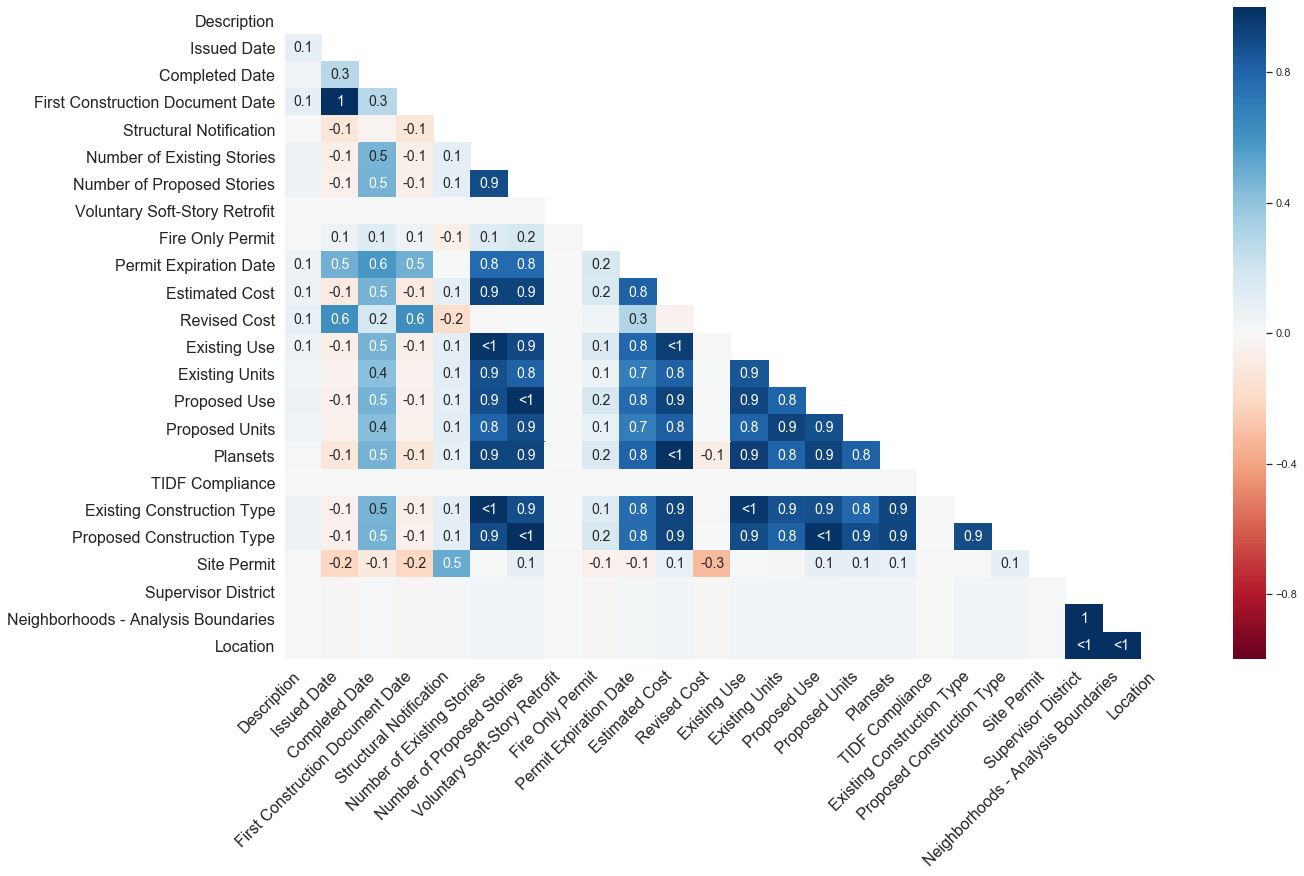

In [22]:
msno.heatmap(data_prepared)

We can see the variables with missing value over 90% of the data are considered Missing value At Random, because they have correlation coef almost 0, from the heatmap.
So i'm going to drop those columns

In [23]:
col_to_drop = ['TIDF Compliance', 'Voluntary Soft-Story Retrofit', 'Site Permit', 'Structural Notification', 'Fire Only Permit']
data_prepared1 = data_prepared.drop(col_to_drop, axis = 1, inplace = False)
data_prepared1.sample(10)

Permit Number  Permit Type Permit Creation Date  \
96714   201508255272            8           08/25/2015   
75574        M558907            8           02/11/2015   
133413  201608154966            8           08/15/2016   
128006  201606210501            8           06/21/2016   
146295  201612296184            8           12/29/2016   
137373  201609208267            8           09/20/2016   
69664   201412083274            3           12/08/2014   
156674  201705106280            8           05/10/2017   
150036  201702169613            8           02/16/2017   
51837        M498008            8           06/19/2014   

                                              Description Current Status  \
96714   unit #509:  interior remodel, relocate kitchen...       complete   
75574                                        street space         issued   
133413  fire sprinkler only - relocate 11 fire sprinkl...         issued   
128006  one for one fire alarm sytem replacement 4-sto...         issued   
146295  barrier removal. add an ada compliant restroom...         issued   
137373                                         re-roofing       complete   
69664   tower crane erection for new building under p/...       complete   
156674  to obtain final inspection for work approved u...       complete   
150036  soft story retrofit per sfbc chapter 34b engin...          filed   
51837                                        street space         issued   

       Current Status Date  Filed Date Issued Date Completed Date  \
96714           02/24/2016  08/25/2015  09/14/2015     02/24/2016   
75574           02/11/2015  02/11/2015  02/11/2015            NaN   
133413          08/15/2016  08/15/2016  08/15/2016            NaN   
128006          06/20/2017  06/21/2016  06/20/2017            NaN   
146295          01/13/2017  12/29/2016  01/13/2017            NaN   
137373          11/17/2016  09/20/2016  09/20/2016     11/17/2016   
69664           01/20/2016  12/08/2014  02/10/2015     01/20/2016   
156674          05/12/2017  05/10/2017  05/10/2017     05/12/2017   
150036          02/16/2017  02/16/2017         NaN            NaN   
51837           06/19/2014  06/19/2014  06/19/2014            NaN   

       First Construction Document Date  ...          Existing Use  \
96714                        09/14/2015  ...            apartments   
75574                        02/11/2015  ...                   NaN   
133413                       08/15/2016  ...                office   
128006                       06/20/2017  ...            apartments   
146295                       01/13/2017  ...  food/beverage hndlng   
137373                       09/20/2016  ...            apartments   
69664                        02/10/2015  ...            vacant lot   
156674                       05/10/2017  ...  food/beverage hndlng   
150036                              NaN  ...            apartments   
51837                        06/19/2014  ...                   NaN   

        Existing Units          Proposed Use  Proposed Units  Plansets  \
96714             44.0            apartments            44.0       2.0   
75574              NaN                   NaN             NaN       NaN   
133413             0.0                office             0.0       2.0   
128006           132.0            apartments           132.0       2.0   
146295             2.0  food/beverage hndlng             2.0       2.0   
137373             3.0            apartments             3.0       0.0   
69664              NaN            vacant lot             NaN       2.0   
156674             0.0  food/beverage hndlng             0.0       0.0   
150036            21.0            apartments            21.0       2.0   
51837              NaN                   NaN             NaN       NaN   

       Existing Construction Type  Proposed Construction Type  \
96714                         3.0                         3.0   
75574                         NaN                      

In [24]:
data_prepared1.isnull().mean().sort_values(ascending = False)

Completed Date                         0.511357
Permit Expiration Date                 0.260835
Existing Units                         0.259115
Proposed Units                         0.255963
Existing Construction Type             0.218029
Proposed Construction Type             0.217004
Number of Proposed Stories             0.215525
Number of Existing Stories             0.215103
Proposed Use                           0.213369
Existing Use                           0.206707
Estimated Cost                         0.191383
Plansets                               0.187577
First Construction Document Date       0.075143
Issued Date                            0.075113
Revised Cost                           0.030498
Neighborhoods - Analysis Boundaries    0.008673
Supervisor District                    0.008632
Location                               0.008547
Description                            0.001458
Filed Date                             0.000000
Current Status Date                    0

In [25]:
data_prepared1['Current Status'].value_counts()

complete       97077
issued         83559
filed          12043
withdrawn       1754
cancelled       1536
expired         1370
approved         733
reinstated       563
suspend          193
revoked           50
plancheck         16
disapproved        2
appeal             2
incomplete         2
Name: Current Status, dtype: int64

Some of the value fron Completed Date variable is missing, the reason is because it's related to current status variable,  if the current status is other than completed, then the value of the date is not exist. the similar variabe to "Completed Date" is "Current Status Date" it's record date when the current status was entered.


I can conclude that around 50% of the data, the current status is complete

We can compare the "Completed Date" and "Current Status Date" variable, where the current status is completed

In [26]:
compare = data_prepared1["Completed Date"][data_prepared1['Current Status'] == 'complete'] == data_prepared1[ "Current Status Date"][data_prepared1['Current Status'] == 'complete']
compare.value_counts()

True    97077
dtype: int64

We can see that all the data in 'Completed Date' and 'current status' are the same where the current status is completed.


So i'm goint to drop the "Completed Date" Variable, because it's redundant with another variable

In [27]:
data_prepared2 = data_prepared1.drop(['Completed Date'], axis = 1)
data_prepared2.isnull().mean().sort_values(ascending = False)

Permit Expiration Date                 0.260835
Existing Units                         0.259115
Proposed Units                         0.255963
Existing Construction Type             0.218029
Proposed Construction Type             0.217004
Number of Proposed Stories             0.215525
Number of Existing Stories             0.215103
Proposed Use                           0.213369
Existing Use                           0.206707
Estimated Cost                         0.191383
Plansets                               0.187577
First Construction Document Date       0.075143
Issued Date                            0.075113
Revised Cost                           0.030498
Neighborhoods - Analysis Boundaries    0.008673
Supervisor District                    0.008632
Location                               0.008547
Description                            0.001458
Filed Date                             0.000000
Current Status Date                    0.000000
Current Status                         0

I'm going to see the heatmap again

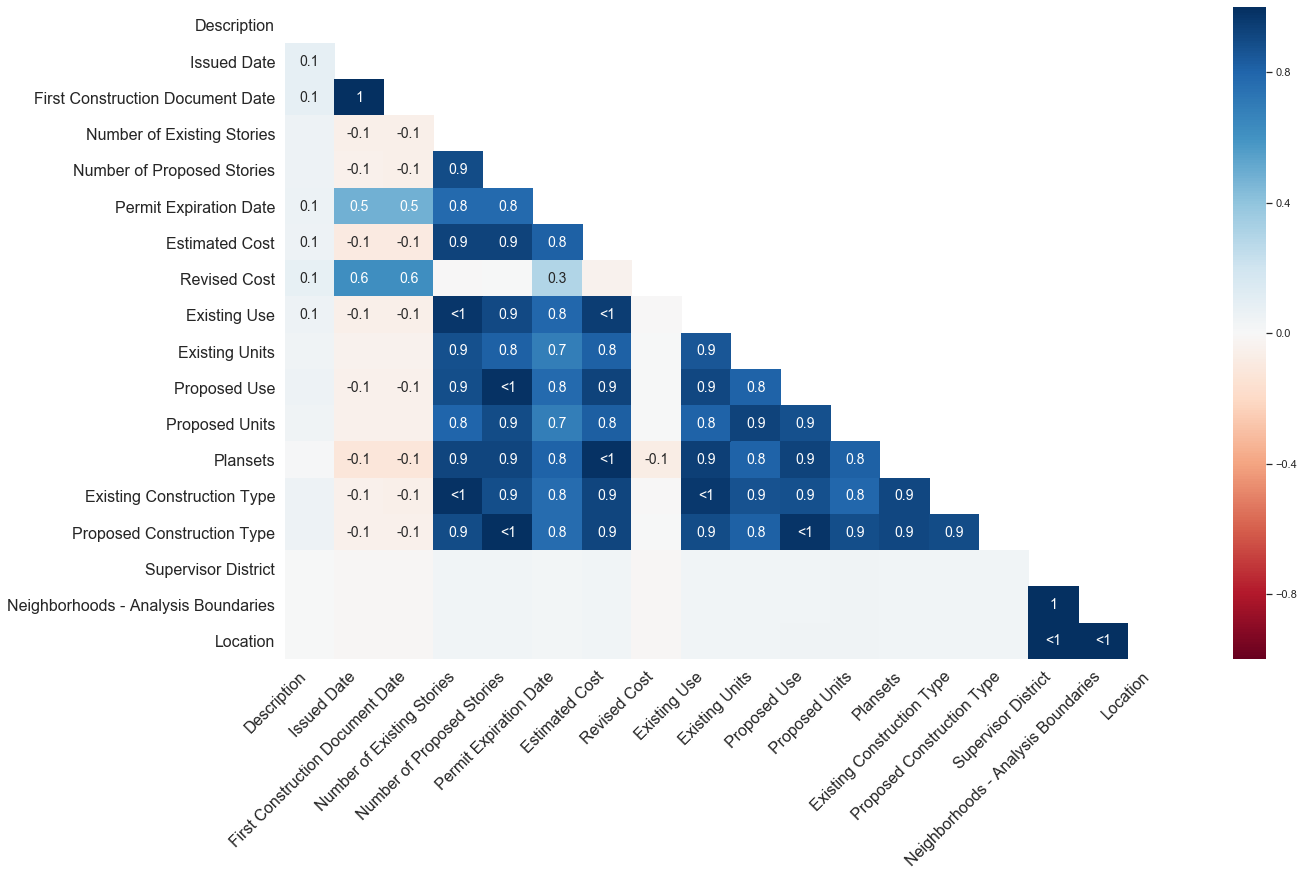

In [28]:
msno.heatmap(data_prepared2)

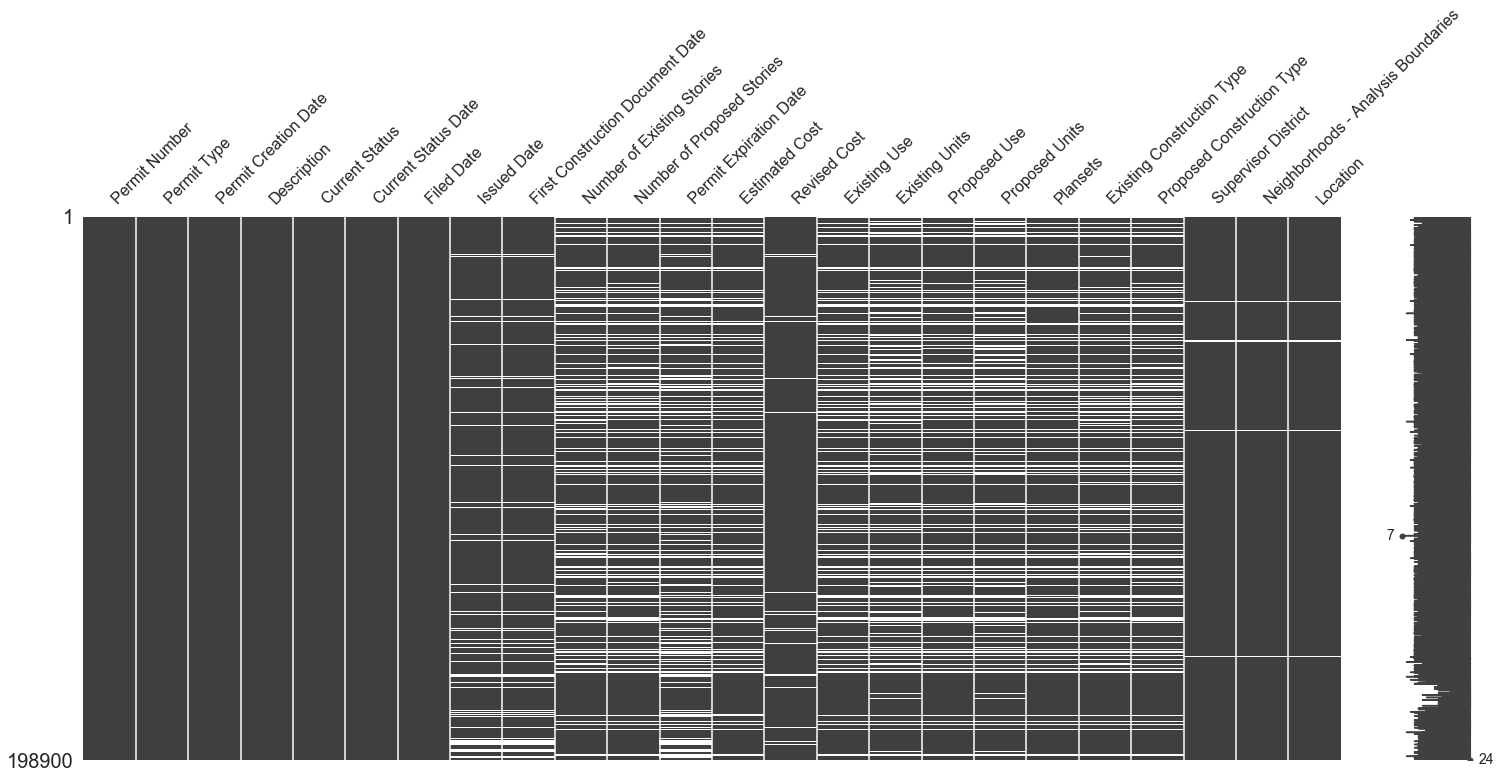

In [29]:
msno.matrix(data_prepared2)

It's seems the are variable with missing value at the same observation

Here we can delete the observed with missing data, because all the missing value are correlated to one another, and the variables with missing data is important for our analysis.

In [30]:
cleaned_data = data_prepared2.dropna().reset_index()

In [31]:
cleaned_data.shape

(131213, 25)

In [32]:
cleaned_data

index Permit Number  Permit Type Permit Creation Date  \
0            3  201611072166            8           11/07/2016   
1            5  201706149344            8           06/14/2017   
2            6  201706300814            8           06/30/2017   
3           24  201708084249            8           08/08/2017   
4           25  201708165014            8           08/16/2017   
5           48  201710110928            8           10/11/2017   
6           68  201711274868            8           11/27/2017   
7           92  201408254591            8           08/25/2014   
8           94  201505196720            8           05/19/2015   
9           97  201602058959            3           02/05/2016   
10         101  201604064066            8           04/06/2016   
11         105  201609097214            8           09/09/2016   
12         107  201610079781            8           10/07/2016   
13         108  201610170423            8           10/17/2016   
14         110  201612144948            8           12/14/2016   
15         113  201702038599            8           02/03/2017   
16         114  201702088915            8           02/08/2017   
17         116  201709148239            8           09/14/2017   
18         117  201703131325            8           03/13/2017   
19         120  201703302779            8           03/30/2017   
20         121  201703161614            8           03/16/2017   
21         122  201704204433            8           04/20/2017   
22         123  201704275068            8           04/27/2017   
23         125  201705035616            8           05/03/2017   
24         126  201705186910            8           05/18/2017   
25         127  201705187018            3           05/18/2017   
26         129  201705267761            8           05/26/2017   
27         131  201705318001            8           05/31/2017   
28         133  201706018123            8           06/01/2017   
29         134  201706068551            8           06/06/2017   
...        ...           ...          ...                  ...   
131183  198790  201802232113            8           02/23/2018   
131184  198791  201802232114            8           02/23/2018   
131185  198792  201711284887            8           11/28/2017   
131186  198795  201802232116            8           02/23/2018   
131187  198796  201802232117            8           02/23/2018   
131188  198797  201802232118            8           02/23/2018   
131189  198799  201802232085            8           02/23/2018   
131190  198800  201802232120            8           02/23/2018   
131191  198801  201802232122            8           02/23/2018   
131192  198803  201802232123            8           02/23/2018   
131193  198804  201802232124            8           02/23/2018   
131194  198806  201802232126            8           02/23/2018   
131195  198807  201802232126            8           02/23/2018   
131196  198808  201802232126            8           02/23/2018   
131197  198812  201802232128            8           02/23/2018   
131198  198813  201802232130            8           02/23/2018   
131199  198825  201802232136            8           02/23/2018   
131200  198834  201802232141            8           02/23/2018   
131201  198835  201802232142            8           02/23/2018   
131202  198844  201802232147            8           02/23/2018   
131203  198845  201802232149            8           02/23/2018   
131204  198846  201802232150            8           02/23/2018   
131205  198851  201504153737            3           04/15/2015   
131206  198863  201802232162            8           02/23/2018   
131207  198867  201802232164            8           02/23/2018   
131208  198873  201802232166            8           02/23/2018   
131209  198874  201802232106            8           02/23/2018   
131210  198877  201802232169            8           02/23/2018   
131211  198879  201802232171            8        

## 2. Analyzing Individual Feature Patterns using Visualization

In [33]:
data.describe()

Permit Type  Street Number          Unit  Number of Existing Stories  \
count  198900.000000  198900.000000  29479.000000               156116.000000   
mean        7.522323    1121.728944     78.517182                    5.705773   
std         1.457451    1135.768948    326.981324                    8.613455   
min         1.000000       0.000000      0.000000                    0.000000   
25%         8.000000     235.000000      0.000000                    2.000000   
50%         8.000000     710.000000      0.000000                    3.000000   
75%         8.000000    1700.000000      1.000000                    4.000000   
max         8.000000    8400.000000   6004.000000                   78.000000   

       Number of Proposed Stories  Estimated Cost  Revised Cost  \
count               156032.000000    1.608340e+05  1.928340e+05   
mean                     5.745043    1.689554e+05  1.328562e+05   
std                      8.613284    3.630386e+06  3.584903e+06   
min                      0.000000    1.000000e+00  0.000000e+00   
25%                      2.000000    3.300000e+03  1.000000e+00   
50%                      3.000000    1.100000e+04  7.000000e+03   
75%                      4.000000    3.500000e+04  2.870750e+04   
max                     78.000000    5.379586e+08  7.805000e+08   

       Existing Units  Proposed Units       Plansets  \
count   147362.000000   147989.000000  161591.000000   
mean        15.666164       16.510950       1.274650   
std         74.476321       75.220444      22.407345   
min          0.000000        0.000000       0.000000   
25%          1.000000        1.000000       0.000000   
50%          1.000000        2.000000       2.000000   
75%          4.000000        4.000000       2.000000   
max       1907.000000     1911.000000    9000.000000   

       Existing Construction Type  Proposed Construction Type  \
count               155534.000000               155738.000000   
mean                     4.072878                    4.089529   
std                      1.585756                    1.578766   
min                      1.000000                    1.000000   
25%                      3.000000                    3.000000   
50%                      5.000000                    5.000000   
75%                      5.000000                    5.000000   
max                      5.000000                    5.000000   

       Supervisor District        Zipcode     Record ID  
count        197183.000000  197184.000000  1.989000e+05  
mean              5.538403   94115.500558  1.162048e+12  
std               2.887041       9.270131  4.918215e+11  
min               1.000000   94102.000000  1.293532e+10  
25%               3.000000   94109.000000  1.308567e+12  
50%               6.000000   94114.000000  1.371840e+12  
75%               8.000000   94122.000000  1.435000e+12  
max              11.000000   94158.000000  1.498342e+12